<center><font size="50"> <b> Pandas </b> </font></center>

From the [pandas github](https://github.com/pandas-dev/pandas) page. Here is a nice article from [towardsdatascience](https://towardsdatascience.com/pandas-series-a-lightweight-intro-b7963a0d62a2) that covers Series and DataFrames pretty well.

Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.

I recommend you reference the book "Python for Data Analysis" by Wes McKinney.  It is free to access on O-Reilly Media web page.

2nd Edition: https://www.oreilly.com/library/view/python-for-data/9781491957653/

3rd edition (pre-release version): https://www.oreilly.com/library/view/python-for-data/9781098104023/

https://wesmckinney.com/book/

Amazon 2nd edition: https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662/ref=sr_1_5?crid=24N2E5QAGATTP&keywords=python+for+data+analysis+by+wes+mckinney&qid=1648438493&sprefix=python+for+data+ana%2Caps%2C107&sr=8-5

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

### The following lines allow you to print out multiple variables in the same window without using the print statement.

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Two most fundamental data structure in pandas 
- [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)
- [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

# Series

One dimensional array like object with associated label(index)

In [4]:
import numpy as np
np.random.seed(1)
random_int = np.random.randint(1, 100, 5)
series = pd.Series(random_int)

Note the index of a series is automatically assigned unless one is specified (just like data frame).

In [5]:
series

0    38
1    13
2    73
3    10
4    76
dtype: int32

In [6]:
series.index

RangeIndex(start=0, stop=5, step=1)

If we don't give index then a default starting from 0 is created.
We can give index with labels

In [7]:
series = pd.Series(random_int, index=['a', 'b', 'c', 'd', 'e'])

series2 = pd.Series(random_int, index=list('abcde'))
series2

a    38
b    13
c    73
d    10
e    76
dtype: int32

In [8]:
series.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [9]:
series.values

array([38, 13, 73, 10, 76])

## We can use boolean filtering(indexing) and math operation

In [10]:
series > 60  # creates a series with values of ture/false and the same index

a    False
b    False
c     True
d    False
e     True
dtype: bool

In [11]:
series[series > 60]  # the true/false series is put into [] to act as a filter.  Only True values are returned.

c    73
e    76
dtype: int32

In [12]:
np.sqrt(series)

a    6.164414
b    3.605551
c    8.544004
d    3.162278
e    8.717798
dtype: float64

or we can use python dict to create a Series (**a common theme in python libraries to take dict**)

In [13]:
sdata = {'Colorado': 5.6, 'Utah': 3.1, 'Nevada': 2.9}
state_ser= pd.Series(sdata)

state_ser

Colorado    5.6
Utah        3.1
Nevada      2.9
dtype: float64

Series object itself and its index have a name attribute

In [14]:
state_ser.index.name= 'Population in Million'
state_ser.name = 'State'

In [15]:
state_ser

Population in Million
Colorado    5.6
Utah        3.1
Nevada      2.9
Name: State, dtype: float64

We can use labels to index value

In [16]:
state_ser[['Colorado', 'Utah']]  # return rows where Colorado or Utah are the index name (not the values)

Population in Million
Colorado    5.6
Utah        3.1
Name: State, dtype: float64

In real dataset there will be values missing for an attribute. Let's add a state with missing value

In [17]:
# state_ser['Texas']= np.NAN
state_ser2 = state_ser
state_ser2

Population in Million
Colorado    5.6
Utah        3.1
Nevada      2.9
Name: State, dtype: float64

In [18]:
state_ser2['Texas']= ''
state_ser2
pd.isna(state_ser2)

Population in Million
Colorado    5.6
Utah        3.1
Nevada      2.9
Texas          
Name: State, dtype: object

Population in Million
Colorado    False
Utah        False
Nevada      False
Texas       False
Name: State, dtype: bool

In [19]:
state_ser

Population in Million
Colorado    5.6
Utah        3.1
Nevada      2.9
Texas          
Name: State, dtype: object

## Checking for missing value(isna, isnull, notnull)

In [20]:
pd.isna(state_ser)

Population in Million
Colorado    False
Utah        False
Nevada      False
Texas       False
Name: State, dtype: bool

In [21]:
pd.isnull(state_ser)

Population in Million
Colorado    False
Utah        False
Nevada      False
Texas       False
Name: State, dtype: bool

In [22]:
# Looks like isnull is an alias for isna...
pd.isnull

<function pandas.core.dtypes.missing.isna(obj)>

# DataFrame

Used for tabular data(2D) representation.
- It has both row and column index.
- Can can be thought of as collection(dict) of Series sharing same index.
- Hierarchical indexing can be used for higher dimensional data.

In [23]:
#Creating a DataFrame from a dictionary
crime = {
    'years':['2007','2008','2009','2010'],
    'vandalism':[33,69,48,44],
    'drug abuse':[46,60,61,67],
    'liquor laws':[86,81,76,86]
}
crime_df = pd.DataFrame(crime)
crime_df

,years,vandalism,drug abuse,liquor laws
0,2007,33,46,86
1,2008,69,60,81
2,2009,48,61,76
3,2010,44,67,86


Note That pandas render table in a nice html format

In [24]:
crime_df.to_html()  # df.read_html(url) reads a table from web page with address url.

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>years</th>\n      <th>vandalism</th>\n      <th>drug abuse</th>\n      <th>liquor laws</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>2007</td>\n      <td>33</td>\n      <td>46</td>\n      <td>86</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2008</td>\n      <td>69</td>\n      <td>60</td>\n      <td>81</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2009</td>\n      <td>48</td>\n      <td>61</td>\n      <td>76</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>2010</td>\n      <td>44</td>\n      <td>67</td>\n      <td>86</td>\n    </tr>\n  </tbody>\n</table>'

In [25]:
#Checking the keys from the original dictionary used to build the dataframe
crime.keys()

dict_keys(['years', 'vandalism', 'drug abuse', 'liquor laws'])

# Some properties of pandas dataframe

In [26]:
#Get column names
crime_df.columns

Index(['years', 'vandalism', 'drug abuse', 'liquor laws'], dtype='object')

In [27]:
#Get indices
crime_df.index

RangeIndex(start=0, stop=4, step=1)

In [28]:
#Get data types in the dataframe
crime_df.dtypes

years          object
vandalism       int64
drug abuse      int64
liquor laws     int64
dtype: object

In [29]:
#Check for null values
crime_df.isna()

,years,vandalism,drug abuse,liquor laws
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False


In [30]:
#Show only a subsample of the dataframe, in this case just the first 2 rows
crime_df.head(2)

,years,vandalism,drug abuse,liquor laws
0,2007,33,46,86
1,2008,69,60,81


In [31]:
## How to view bottom two rows ??
crime_df.tail(2)

,years,vandalism,drug abuse,liquor laws
2,2009,48,61,76
3,2010,44,67,86


In [32]:
# How to get underlying 2d numpy array??
crime_df.values

array([['2007', 33, 46, 86],
       ['2008', 69, 60, 81],
       ['2009', 48, 61, 76],
       ['2010', 44, 67, 86]], dtype=object)

In a real dataset we have lot of columns. We can arrange columns and give index values

In [33]:
#Creating the same dataframe but specifying the column names and indices 
crime_df = {
    'years':['2007','2008','2009','2010'],
    'vandalism':[33,69,48,44],
    'drug abuse':[46,60,61,67],
    'liquor laws':[86,81,76,86]
}

pd.DataFrame(crime,
             columns=['years', 'liquor laws', 'drug abuse', 'vandalism'], 
             index =list('abcd'))

,years,liquor laws,drug abuse,vandalism
a,2007,86,46,33
b,2008,81,60,69
c,2009,76,61,48
d,2010,86,67,44


In [34]:
# or we alrady have read the dataframe and we specify which columns to use/order
pd.DataFrame(crime_df, columns=['liquor laws', 'drug abuse', 'vandalism', 'years'])

,liquor laws,drug abuse,vandalism,years
0,86,46,33,2007
1,81,60,69,2008
2,76,61,48,2009
3,86,67,44,2010


In [35]:
# or we want the years to be the indices
crime_df = pd.DataFrame(crime_df, columns=['years', 'liquor laws', 'drug abuse', 'vandalism'] )
crime_df2 = crime_df.set_index('years')
crime_df2
crime_df

,liquor laws,drug abuse,vandalism
years,,,
2007,86,46,33
2008,81,60,69
2009,76,61,48
2010,86,67,44


,years,liquor laws,drug abuse,vandalism
0,2007,86,46,33
1,2008,81,60,69
2,2009,76,61,48
3,2010,86,67,44


In [36]:
crime_df

,years,liquor laws,drug abuse,vandalism
0,2007,86,46,33
1,2008,81,60,69
2,2009,76,61,48
3,2010,86,67,44


What happened, we just set the index....

In [37]:
# Use inplace to modify data frame
crime_df.set_index('years', inplace=True)
crime_df

,liquor laws,drug abuse,vandalism
years,,,
2007,86,46,33
2008,81,60,69
2009,76,61,48
2010,86,67,44


# Slicing and dicing DataFrame([ ], loc, iloc)

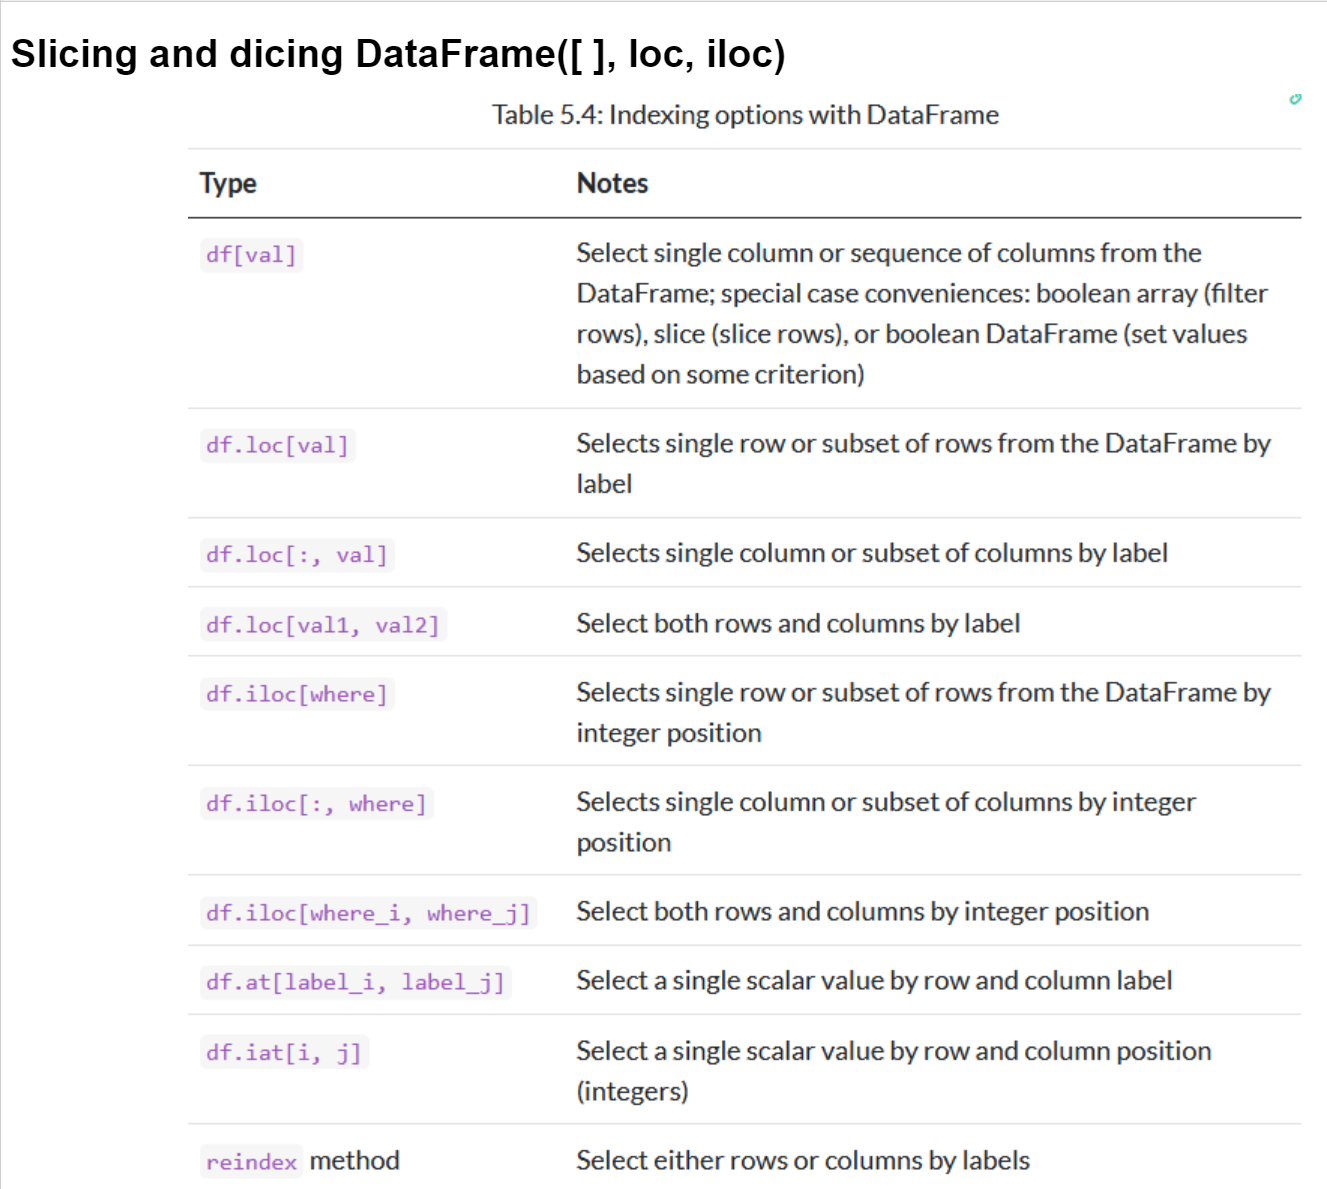

In [38]:
#To access a single column :
crime_df[['drug abuse']]
# type(crime_df[['drug abuse']])
# type(crime_df['drug abuse'])

,drug abuse
years,
2007,46
2008,60
2009,61
2010,67


In [39]:
#To access multiple columns :
crime_df[['drug abuse', 'vandalism']]

,drug abuse,vandalism
years,,
2007,46,33
2008,60,69
2009,61,48
2010,67,44


## slicing or selecting data with a boolean array

In [40]:
# crime_df
# crime_df['vandalism']>40
crime_df[crime_df['vandalism']>40]

,liquor laws,drug abuse,vandalism
years,,,
2008,81,60,69
2009,76,61,48
2010,86,67,44


In [41]:
#or use attribute access
crime_df.vandalism

years
2007    33
2008    69
2009    48
2010    44
Name: vandalism, dtype: int64

In [42]:
# use drug abuse as property to access this colums
# crime_df.drug abuse #can't have a space in the name
























Valid Python variable name is required. Let's change it.

**Search for pandas function and use it to rename drug abuse to *drug_abuse***

In [43]:
crime_df.columns = [col.replace(' ', '_') for col in crime_df.columns]
crime_df.columns
# crime_df.drug_abuse

Index(['liquor_laws', 'drug_abuse', 'vandalism'], dtype='object')

In [44]:
#Write code here
crime_df.rename(columns={"drug abuse":"drug_abuse"}, inplace=True)
crime_df

,liquor_laws,drug_abuse,vandalism
years,,,
2007,86,46,33
2008,81,60,69
2009,76,61,48
2010,86,67,44


## Rows can be retrieved using loc and iloc

## loc
- loc uses label/index
- conditional lookup

In [45]:
#
crime_df

,liquor_laws,drug_abuse,vandalism
years,,,
2007,86,46,33
2008,81,60,69
2009,76,61,48
2010,86,67,44


In [46]:
# Using label

series_2010 = crime_df.loc[['2010'], ['drug_abuse', 'vandalism']]
series_2010

,drug_abuse,vandalism
years,,
2010,67,44


In [47]:
crime_df

,liquor_laws,drug_abuse,vandalism
years,,,
2007,86,46,33
2008,81,60,69
2009,76,61,48
2010,86,67,44


In [48]:
# Conditional row selection
crime_df.loc[crime_df.drug_abuse>50]

,liquor_laws,drug_abuse,vandalism
years,,,
2008,81,60,69
2009,76,61,48
2010,86,67,44


<font color = "red">Indexing returns a view </font>

In [49]:
series_2010.drug_abuse = 1.0
series_2010

,drug_abuse,vandalism
years,,
2010,1.0,44


In [50]:
crime_df

,liquor_laws,drug_abuse,vandalism
years,,,
2007,86,46,33
2008,81,60,69
2009,76,61,48
2010,86,67,44


## iloc
use it for integer location based indexing 

In [51]:
crime_df

,liquor_laws,drug_abuse,vandalism
years,,,
2007,86,46,33
2008,81,60,69
2009,76,61,48
2010,86,67,44


In [52]:
crime_df.iloc[1:3, 1:3]

,drug_abuse,vandalism
years,,
2008,60,69
2009,61,48


In [53]:
#There are times when we want to inverse the rows and columns. 
#The built-in transpose method takes care of it for us
crime_df.T

years,2007,2008,2009,2010
liquor_laws,86,81,76,86
drug_abuse,46,60,61,67
vandalism,33,69,48,44


# Reindex
create new DataFrame as per new index

In [54]:
df = pd.DataFrame(np.arange(12).reshape((4,3)), index=[0, 3 ,5 ,9], columns=['a', 'b', 'c'])
df

,a,b,c
0,0,1,2
3,3,4,5
5,6,7,8
9,9,10,11


In [55]:
# row reindexing
df.reindex(range(10))

,a,b,c
0,0.0,1.0,2.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,3.0,4.0,5.0
4,NaN,NaN,NaN
5,6.0,7.0,8.0
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,9.0,10.0,11.0


In [56]:
# column reindexing
df.reindex(columns=['c', 'b'])

,c,b
0,2,1
3,5,4
5,8,7
9,11,10


# Drop row or column

In [57]:
data_df = pd.DataFrame(np.arange(16).reshape((4, 4)),
                      index=['Ohio', 'Colorado', 'Florida', 'New York'],
                      columns=['one', 'two', 'three', 'four'])
data_df

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Florida,8,9,10,11
New York,12,13,14,15


In [58]:
data_df.drop(['Florida'])
# data_df

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,12,13,14,15


## To drop column use axis = 1, axis =0 is default

In [59]:
data_df.drop(['one', 'three'], axis=1)

,two,four
Ohio,1,3
Colorado,5,7
Florida,9,11
New York,13,15


## Let's combine dropping rows with missing values

In [60]:
data_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# dropna function arguments : 
# axis (row = 0, column = 1) 
# how (any or all values are NA)
# thresh (required number of non NAs, can only drop row is x values or more in row are NA)
# subset (if dropping rows it would be a subset of columns to consider)
# inplace (dropping to be done in place or not)

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Florida,8,9,10,11
New York,12,13,14,15


## We can also replace missing values with a given value

In [61]:
# data_df.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)
data_df.fillna?
data_df.fillna(0) #shift tab-tab

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Florida,8,9,10,11
New York,12,13,14,15


### pandas fillna method: 
method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None

Method to use for filling holes in reindexed Series pad / ffill: propagate last valid observation forward to next valid backfill / bfill: use next valid observation to fill gap.

In [62]:
data_df.replace(0,np.nan, inplace=True)  # make a NaN value
data_df.fillna(method='ffill')  # foward fill doesn't go up to fill in the first row.  inplace=True not set so df is not changed

,one,two,three,four
Ohio,NaN,1,2,3
Colorado,4.0,5,6,7
Florida,8.0,9,10,11
New York,12.0,13,14,15


In [63]:
data_df.fillna(method='bfill')  # goes up to first row.  inplace=True not set so df is not changed

,one,two,three,four
Ohio,4.0,1,2,3
Colorado,4.0,5,6,7
Florida,8.0,9,10,11
New York,12.0,13,14,15


# Arithmetic operation support and element wise array operation from numpy


In [64]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [65]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                    columns=list('abcde'))
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [66]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [67]:
np.exp(df1)
# df1

,a,b,c,d
0,1.000000,2.718282,7.389056,20.085537
1,54.598150,148.413159,403.428793,1096.633158
2,2980.957987,8103.083928,22026.465795,59874.141715


# Applying lambda function to frame

In [68]:
# Apply a function row wise
df1.apply(lambda x: x.max())

a     8.0
b     9.0
c    10.0
d    11.0
dtype: float64

In [69]:
# Or apply column wise axis =1 or columns
df1.apply(lambda x: x.max(), axis='columns')

0     3.0
1     7.0
2    11.0
dtype: float64

Do these results seem strange to you ?... Are the results row-wise and column-wise or did we brake something ?

# Applymap for element wise function

In [70]:
#Casting each individual value to type int
df1.applymap(lambda x: int(x) )

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [71]:
#Squaring each individual value of column 'a'
df1['a'].map(lambda x: x**2)

0     0.0
1    16.0
2    64.0
Name: a, dtype: float64

### Apply to call a function that can apply to any or just one of the columns

In [72]:
def func(row):  # apply a function to multiple columns
    x = row['a'] + row['b'] * row['c']
    return x

df1['d'] = df1.apply(func,axis=1)
df1

,a,b,c,d
0,0.0,1.0,2.0,2.0
1,4.0,5.0,6.0,34.0
2,8.0,9.0,10.0,98.0


## Grouping similar data 

In [73]:
df_animals = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                    'Max Speed': [380., 370., 24., 26.]})
df_animals

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [74]:
#Group data based on the 'Animal' column and calculate the mean
# df_animals.groupby(['Animal'])
df_animals.groupby(['Animal']).mean()  # can use mean, max, min, count, sum, etc.

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


We can create subcategories in our indices, this is called multi-indexing and group based on those.

In [75]:
#We create the indices for two animals and their respective habitats
animal_habitat = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
          ['Captive', 'Wild', 'Captive', 'Wild']]


#We create a multi-index
index = pd.MultiIndex.from_arrays(animal_habitat, names=('Animal', 'Habitat'))


#Create our dataframe like before and we specify the indices to use
df_subcat = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]},
                   index=index)


#Ta-da!
df_subcat

Max Speed
Animal Habitat           
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

In [76]:
#How do we access the Parrot information only ?
df_subcat.loc['Parrot']

#How do we access the parrot's flight speed in the wild ?
df_subcat.loc['Parrot', 'Wild']

,Max Speed
Habitat,
Captive,30.0
Wild,20.0


Max Speed    20.0
Name: (Parrot, Wild), dtype: float64

In [77]:
#How do we use the group by if we have multi-index ? Say we want the average flight speed of each animal
df_subcat.groupby(level=0).mean()

df_subcat.groupby(level=1).mean()

,Max Speed
Animal,
Falcon,370.0
Parrot,25.0


,Max Speed
Habitat,
Captive,210.0
Wild,185.0


## Joining, Appending, Concatenating and Merging

There are 4 ways to combine dat from dataframes, these are grouped into 2 types : combining data by columns and by rows.

- Merge : SQL-like joins. Takes different columns from different dataframes and combines them into a dataframe.

- Join : SQL-like joins, has small syntax differences with merge but has essentially same functionality.

- Append : "stacks" dataframes on top of each other

- Concatenate : "stacks" dataframes on top of each other


### Let's tackle column wise merge

In [78]:
#Load up the data
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [79]:
#Create two df with different data
totalBill = tips.groupby(['sex', 'smoker'])[['total_bill']].sum()
people = tips.groupby(['sex', 'smoker'])[['size']].sum()

In [80]:
totalBill

total_bill
sex    smoker            
Male   Yes        1337.07
       No         1919.75
Female Yes         593.27
       No          977.68

In [81]:
people

size
sex    smoker      
Male   Yes      150
       No       263
Female Yes       74
       No       140

In [82]:
#We want to join on the indices. Note, since we have multi-index the number of levels must match.
pd.merge(totalBill, people,
        right_index=True, left_index=True)

total_bill  size
sex    smoker                  
Male   Yes        1337.07   150
       No         1919.75   263
Female Yes         593.27    74
       No          977.68   140

In [83]:
#We can get an even more SQL-like join by picking on which columns we want to merge on:
pd.merge(totalBill.reset_index(),
        people.reset_index(),
        on=['sex','smoker'])

,sex,smoker,total_bill,size
0,Male,Yes,1337.07,150
1,Male,No,1919.75,263
2,Female,Yes,593.27,74
3,Female,No,977.68,140


### Now for stacking dataframes together

In [84]:
#At the top is totalBill, followed by tip, followed by totalBill :
pd.concat([totalBill, people, totalBill], sort=False)
#Note we can specify the axis and concateate by columns also, by default we have axis=0

total_bill   size
sex    smoker                   
Male   Yes        1337.07    NaN
       No         1919.75    NaN
Female Yes         593.27    NaN
       No          977.68    NaN
Male   Yes            NaN  150.0
       No             NaN  263.0
Female Yes            NaN   74.0
       No             NaN  140.0
Male   Yes        1337.07    NaN
       No         1919.75    NaN
Female Yes         593.27    NaN
       No          977.68    NaN

## Pivot tables and Cross-tabulations

### Pivot tables

As we saw with the example above where we take the transpose of a matrix which swaps columns and rows, there are times when we want more granular control over how we're swapping columns and rows. It is important to remember that pivot tables are primarily used for aggregating data, by default pivot tables use numpy.mean().

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                          "bar", "bar", "bar", "bar"],
                    "B": ["one", "one", "one", "two", "two",
                          "one", "one", "two", "two"],
                    "C": ["small", "large", "large", "small",
                          "small", "large", "small", "small",
                          "large"],
                    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                    "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [86]:
#This first example aggregates values by taking the sum.
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                     columns=['C'], aggfunc=np.sum)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [87]:
#We can also fill missing values using the `fill_value` parameter.
table = pd.pivot_table(df, values=['D','E'], index=['A', 'B'],
                     columns=['C'], aggfunc=np.sum, fill_value=0)
table

D           E      
C       large small large small
A   B                          
bar one     4     5     6     8
    two     7     6     9     9
foo one     4     1     9     2
    two     0     6     0    11

In [88]:
#The next example aggregates by taking the mean across multiple columns.
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
                     aggfunc={'D': np.mean,
                              'E': np.mean})
table

D         E
A   C                        
bar large  5.500000  7.500000
    small  5.500000  8.500000
foo large  2.000000  4.500000
    small  2.333333  4.333333

In [89]:
#Variation :
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
                     aggfunc={'D': np.mean,
                              'E': np.sum})
table

D   E
A   C                  
bar large  5.500000  15
    small  5.500000  17
foo large  2.000000   9
    small  2.333333  13

In [90]:
#We can also calculate multiple types of aggregations for any given value column.
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
                     aggfunc={'D': np.mean,
                              'E': [min, max, np.mean]})
table

D    E               
               mean  max      mean  min
A   C                                  
bar large  5.500000  9.0  7.500000  6.0
    small  5.500000  9.0  8.500000  8.0
foo large  2.000000  5.0  4.500000  4.0
    small  2.333333  6.0  4.333333  2.0

In [91]:
#Let's access data by row
#Get bar stuff :
# table.loc['bar']

#Get bar and large stuff : (returns a series, try for a dataframe)
# table.loc['bar'].loc['large']

#Can use iloc as well :
# table.iloc[2]

#Let's access data by column :
#Get everything in column E
# table['E']

#Get only the mean column 
table['E']['mean'] #(returns a series, try for a dataframe)
# table['E'][['mean']] #returning a dataframe
# pd.DataFrame(table['E']['mean']) #casting

A    C    
bar  large    7.500000
     small    8.500000
foo  large    4.500000
     small    4.333333
Name: mean, dtype: float64

In [92]:
#Let's load up a data set from seaborn
exercise = sns.load_dataset('exercise')

#Unnamed column is useless...
exercise.drop('Unnamed: 0', axis=1, inplace=True)
exercise

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
...,...,...,...,...,...
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
87,30,no fat,99,1 min,running
88,30,no fat,111,15 min,running


In [93]:
#Let get diet as the index and have columns pulse, time and kind....
exercise.pivot_table(index="diet", columns=["time","kind","pulse"])

id                                                   ...          \
time    1 min                                                   ...  30 min   
kind     rest                                          walking  ... walking   
pulse     80   83   85   87   90   91   92   97    100     84   ...     104   
diet                                                            ...           
no fat    NaN  6.0  NaN  7.0  NaN  NaN  8.0  9.0  10.0    16.0  ...     NaN   
low fat   4.0  NaN  1.0  NaN  2.0  5.0  NaN  3.0   NaN     NaN  ...    12.0   

                                                                 
time                                                             
kind    running                                                  
pulse       99    110   112   116   120   130   140   143   150  
diet                                                             
no fat      NaN   NaN   NaN   NaN   NaN  29.0  27.5  26.0  30.0  
low fat    23.0  21.0  22.0  25.0  24.0   NaN   NaN   NaN   NaN  

[2 rows x 79 columns]

In [94]:
pd.pivot_table?

In [95]:
#If we just want an average over all participants we can drop the participants ID
exercise.drop('id', axis=1, inplace=True)
exercise

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest
...,...,...,...,...
85,no fat,135,15 min,running
86,no fat,130,30 min,running
87,no fat,99,1 min,running
88,no fat,111,15 min,running


In [96]:
exercise.pivot_table(index=["diet","kind"], columns="time")

pulse              
time            1 min 15 min 30 min
diet    kind                       
no fat  rest     91.8   92.2   93.0
        walking  95.6   98.6   96.6
        running  98.2  124.4  140.6
low fat rest     88.6   89.6   89.8
        walking  90.6   94.6   95.2
        running  94.0  109.8  111.4

In [97]:
#Let's try this !
exercise.pivot_table(index=["kind"], columns=["time"])

pulse              
time    1 min 15 min 30 min
kind                       
rest     90.2   90.9   91.4
walking  93.1   96.6   95.9
running  96.1  117.1  126.0

# Uh-oh......

In [98]:
#Let's load up a data set from seaborn
exercise = sns.load_dataset('exercise')

#Unnamed column is useless...
exercise.drop('Unnamed: 0', axis=1, inplace=True)

#Let's look at participant 1's information
exercise[exercise['id'] == 1]

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest


In [99]:
#Since pivot tables are used to aggregate data, a more natural use is getting the average pulse for all 
#participants in each diet and kind of exercise.
exercise.drop(['id'], axis=1, inplace= True)
exercise.pivot_table(index=["diet","kind"], columns=["time"])

pulse              
time            1 min 15 min 30 min
diet    kind                       
no fat  rest     91.8   92.2   93.0
        walking  95.6   98.6   96.6
        running  98.2  124.4  140.6
low fat rest     88.6   89.6   89.8
        walking  90.6   94.6   95.2
        running  94.0  109.8  111.4

## Cross-tabulations
these are also known as contingency tables, which show the multivariate frequency distribution of variables. It gives you an overview of the interrelations between two variables.

In [100]:
titanic = sns.load_dataset('titanic')
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [101]:
#Let's look at how many people survived based on gender :
pd.crosstab(titanic.sex, titanic.survived)
#Notice that the data should be categorical, otherwise you will get sparce matrices...

survived,0,1
sex,,
female,81,233
male,468,109


In [102]:
#If we want to get totals based on row/columns we need to use an additional argument:
pd.crosstab(titanic.sex, titanic.survived, margins=True)

survived,0,1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [103]:
#We can have multiple variables :
pd.crosstab([titanic.sex, titanic.who], [titanic.survived])

survived        0    1
sex    who            
female child   15   28
       woman   66  205
male   child   19   21
       man    449   88

In [104]:
#We can also extract percentages directly :
pd.crosstab(titanic.sex, [titanic.survived, titanic.who], normalize="index")

survived         0                             1                    
who          child       man     woman     child       man     woman
sex                                                                 
female    0.047771  0.000000  0.210191  0.089172  0.000000  0.652866
male      0.032929  0.778163  0.000000  0.036395  0.152513  0.000000

## Binning data and Dummy coding

Binning data is simply grouping together data based on their numerical value, i.e. [1,2,4] [6,7,8] [23,24,25] 

Dummy coding is changing a categorical variable into a numerical (int) value.

Let's jump into binning data first.

In [105]:
crashes = sns.load_dataset('car_crashes')
crashes.head(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


In [106]:
#Let's look at the minimum and maximum in crashs
"Min number of total",crashes.total.min()
"Max number of total",crashes.total.max()

('Min number of total', 5.9)

('Max number of total', 23.9)

In [107]:
#Let's define our bins :
bins = [0, 8.9, 11.9, 14.9, 17.9, 20.9, 23.9]

titles = ['very low', 'low', 'moderate-low', 'moderate-high', 'high', 'very high']

#Let's create a new column titled safety_rating
crashes['safety_rating'] = pd.cut(crashes['total'], bins, labels=titles)
crashes.head(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,safety_rating
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,high
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,high
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,high
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,very high
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,moderate-low
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO,moderate-low
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT,low
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE,moderate-high
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC,very low
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL,moderate-high


### Pandas can cut in many ways.  You can cut evenly spaced across the range of values.

In [108]:
pd.cut(crashes['total'], 6, labels=titles).head(10)  # make six bins, ranging from min(total) to max(total)

0             high
1             high
2             high
3        very high
4     moderate-low
5     moderate-low
6              low
7    moderate-high
8         very low
9    moderate-high
Name: total, dtype: category
Categories (6, object): ['very low' < 'low' < 'moderate-low' < 'moderate-high' < 'high' < 'very high']

### Pandas can cut on quantiles, quintiles, etc using qcut.  This makes each bin have an equal number of rows.

In [109]:
pd.qcut(crashes['total'], 6, labels=titles).head(10)  # make six bins, ranging from min(total) to max(total)

0             high
1             high
2             high
3        very high
4              low
5              low
6         very low
7    moderate-high
8         very low
9             high
Name: total, dtype: category
Categories (6, object): ['very low' < 'low' < 'moderate-low' < 'moderate-high' < 'high' < 'very high']

### One-hot encoding using pandas dummies

In [110]:
#Mmm.... we still only have 0 and 1 but we have 3 variables. What do we do now ?...
# titanic who column is "man" or "woman".  
pd.get_dummies(titanic.who, drop_first=True)  # breaks into one column for each unique value in column "who"

,man,woman
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
886,1,0
887,0,1
888,0,1
889,1,0


In [111]:
#Let's take a closer look at the documentation : 
pd.get_dummies?

In [112]:
#We can also pass in a dataframe to the function :
# note sex column is male or female and who column is man or woman.
# drop_first mean: Whether to get k-1 dummies out of k categorical levels by removing the first level.
# drop_first means we drop the column sex_female.
pd.get_dummies(titanic, columns=['sex', 'who'], drop_first=True)

,survived,pclass,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,sex_male,who_man,who_woman
0,0,3,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False,1,1,0
1,1,1,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False,0,0,1
2,1,3,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,True,0,0,1
3,1,1,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False,0,0,1
4,0,3,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,True,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Second,True,NaN,Southampton,no,True,1,1,0
887,1,1,19.0,0,0,30.0000,S,First,False,B,Southampton,yes,True,0,0,1
888,0,3,NaN,1,2,23.4500,S,Third,False,NaN,Southampton,no,False,0,0,1
889,1,1,26.0,0,0,30.0000,C,First,True,C,Cherbourg,yes,True,1,1,0


In [113]:
#Settings :
# pd.describe_option()

# pd.get_option('display.max_rows')
pd.set_option('display.max_rows',None)

In [114]:
titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
84,1,2,female,17.0,0,0,10.5000,S,Second,woman,False,NaN,Southampton,yes,True
688,0,3,male,18.0,0,0,7.7958,S,Third,man,True,NaN,Southampton,no,True
142,1,3,female,24.0,1,0,15.8500,S,Third,woman,False,NaN,Southampton,yes,False
794,0,3,male,25.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
744,1,3,male,31.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,yes,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
809,1,1,female,33.0,1,0,53.1000,S,First,woman,False,E,Southampton,yes,False
320,0,3,male,22.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
623,0,3,male,21.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True


### Correlation and Returns

### This code actually works for reading stock data from Yahoo Finance

C:\Users\ddalton\AppData\Local\Temp/ipykernel_1332/440510266.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  start = pd.to_datetime(['2007-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
C:\Users\ddalton\AppData\Local\Temp/ipykernel_1332/440510266.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  end = pd.to_datetime(['2021-03-29']).astype(int)[0]//10**9 # convert to unix timestamp.


,AAPL,IBM,MSFT,GOOG
Date,,,,
2007-01-03,2.562706,57.683746,21.784674,232.921951
2007-01-04,2.619589,58.300541,21.748198,240.727692
2007-01-05,2.600933,57.772720,21.624176,242.685349
2007-01-08,2.613778,58.650391,21.835743,240.887100
2007-01-09,2.830904,59.344231,21.857635,241.843506
2007-01-10,2.966380,58.644470,21.638760,243.816116
2007-01-11,2.929683,58.502136,22.397511,248.926956
2007-01-12,2.893596,58.911350,22.769579,251.557098
2007-01-16,2.969438,59.788998,22.733107,251.198441


,AAPL,IBM,MSFT,GOOG
Date,,,,
2007-01-03,1238319600,9619853,76935100,15470772
2007-01-04,847260400,11008627,45774500,15834329
2007-01-05,834741600,7553480,44607200,13795717
2007-01-08,797106800,10815640,50220200,9544441
2007-01-09,3349298400,11619177,44636600,10803142
2007-01-10,2952880000,9147061,55017400,11981743
2007-01-11,1440252800,8368732,99464300,14470436
2007-01-12,1312690400,6941779,103972500,8980937
2007-01-16,1244076400,10043901,62379600,15194540


<AxesSubplot:xlabel='Date'>

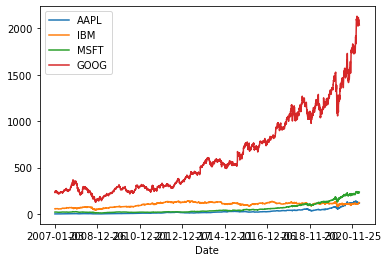

In [116]:
start = pd.to_datetime(['2007-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2021-03-29']).astype(int)[0]//10**9 # convert to unix timestamp.

url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'AAPL' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
price = pd.read_csv(url)
volume = price.drop(columns=['Open','High','Low','Close', 'Adj Close'])
price.drop(columns=['Open','High','Low','Close', 'Volume'], inplace = True)
price.columns = ['Date','AAPL']
volume.columns = ['Date','AAPL']

for ticker in ['IBM', 'MSFT', 'GOOG']:
    url = 'https://query1.finance.yahoo.com/v7/finance/download/' + ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
    dftemp = pd.read_csv(url)
    price[ticker] = dftemp['Adj Close']
    volume[ticker] = dftemp['Volume']
    
price.set_index(['Date'],inplace=True)
volume.set_index(['Date'],inplace=True)

price.head(10)
volume.head(10)
price.plot()



### Calculate returns

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-03-22,0.028336,0.012801,0.024485,-0.002256
2021-03-23,-0.006889,-0.000689,0.006737,0.007049
2021-03-24,-0.019994,0.001226,-0.008923,-0.003848
2021-03-25,0.004164,0.018757,-0.013251,-0.000342
2021-03-26,0.005141,0.024874,0.017819,-0.004309


<AxesSubplot:xlabel='Date'>

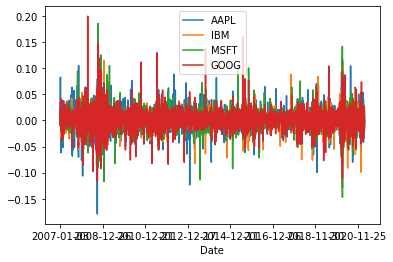

In [117]:
returns = price.pct_change()
returns.tail()
returns.plot()

### Correlation and covariance

In [118]:
returns['MSFT'].corr(returns['IBM'])
returns['MSFT'].cov(returns['IBM'])

0.5421172370796589

0.00014693734143373386

### Correlation of Microsoft returns to IBM returns

In [119]:
returns.MSFT.corr(returns.IBM)

0.5421172370796589

### Correlation table and covariance table

In [120]:
returns.corr()
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.468741,0.546438,0.568313
IBM,0.468741,1.000000,0.542117,0.470876
MSFT,0.546438,0.542117,1.000000,0.602571
GOOG,0.568313,0.470876,0.602571,1.000000


,AAPL,IBM,MSFT,GOOG
AAPL,0.000421,0.000145,0.000201,0.000216
IBM,0.000145,0.000229,0.000147,0.000132
MSFT,0.000201,0.000147,0.000321,0.000200
GOOG,0.000216,0.000132,0.000200,0.000342


### Correlation of returns with IBM and with stock volumes

In [121]:
returns.corrwith(returns.IBM)
returns.corrwith(volume)

AAPL    0.468741
IBM     1.000000
MSFT    0.542117
GOOG    0.470876
dtype: float64

AAPL   -0.047474
IBM    -0.071211
MSFT   -0.054663
GOOG   -0.026909
dtype: float64